# Using the Data
Now that we have all the Americredit Automobile Receivables Trust 2019-1 (AMCAR 2019-1) files saved down, we will analyze the data. <br>
When COVID hit, many auto lenders extended loans. We are going to look at the default performance (CDR, constant default rate) for loans that were extended in April 2020 and compare it to non-extended loans as well as the total default rate. 

In [1]:
#import modules
import pandas as pd
import numpy as np
import os
from os import listdir
import glob

In [2]:
#set up path to import CSV files and get a lsit of files. update CIK number if necessary
CIK='0001765880'
path='SEC/0001765880/'
csvfiles=[file for file in os.listdir('sec/'+CIK) if file.endswith(".csv")]

In [3]:
#import CSV for dtype dictionary, saved in a CSV file
file4='Column and DTYPE.csv'
dtypes= pd.read_csv(file4, index_col=0, header=None, squeeze=True).to_dict()
columns=list(dtypes.keys())
#date columns need to be parsed separately
datecols=['reportingPeriodBeginningDate','reportingPeriodEndingDate','interestPaidThroughDate','originationDate','loanMaturityDate','originalFirstPaymentDate']

In [4]:
#import all CSV files into single dataframe named frame
all_files = glob.glob(path + "/*.csv")
li = []
for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0, dtype=dtypes, usecols=columns, parse_dates=datecols)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)

In [5]:
#define function that will optimize datatype and execute. There are many rows of data
def reduce_mem_usage(df):
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
    if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)                    
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df
reduce_mem_usage(frame)

Memory usage of dataframe is 288.36 MB
Memory usage after optimization is: 281.00 MB
Decreased by 2.6%


,assetNumber,reportingPeriodBeginningDate,reportingPeriodEndingDate,originationDate,originalLoanAmount,originalLoanTerm,loanMaturityDate,originalInterestRatePercentage,originalFirstPaymentDate,gracePeriodNumber,...,actualInterestCollectedAmount,actualPrincipalCollectedAmount,actualOtherCollectedAmount,interestPaidThroughDate,currentDelinquencyStatus,chargedoffPrincipalAmount,recoveredAmount,paymentExtendedNumber,repossessedIndicator,repossessedProceedsAmount
0,0001765880 - 000001,2019-01-01,2019-01-31,2013-12-01,29667.18,74,2020-01-01,0.1490,2014-02-01,2,...,94.06,535.21,0.0,2019-01-07,0.0,0.0,0.0,0,False,0.0
1,0001765880 - 000002,2019-01-01,2019-01-31,2013-12-01,22275.53,74,2020-09-01,0.0990,2014-02-01,2,...,153.39,413.61,0.0,2019-01-10,18.0,0.0,0.0,2,False,0.0
2,0001765880 - 000003,2019-01-01,2019-01-31,2013-12-01,10170.00,68,2019-11-01,0.1745,2014-02-01,2,...,0.00,0.00,0.0,2018-11-26,18.0,0.0,0.0,0,False,0.0
3,0001765880 - 000004,2019-01-01,2019-01-31,2013-12-01,10501.25,62,2019-05-01,0.0845,2014-02-01,2,...,10.26,205.69,0.0,2019-01-26,0.0,0.0,0.0,0,False,0.0
4,0001765880 - 000005,2019-01-01,2019-01-31,2013-12-01,33865.00,73,2020-06-01,0.1290,2014-01-01,1,...,259.11,840.89,0.0,2019-01-29,31.0,0.0,0.0,0,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1286654,0001765880 - 062802,2020-12-01,2020-12-31,2019-01-01,7507.97,74,2025-02-01,0.1599,2019-03-01,2,...,0.00,0.00,0.0,2020-11-27,17.0,0.0,0.0,0,False,0.0
1286655,0001765880 - 062803,2020-12-01,2020-12-31,2019-01-01,14458.80,73,2025-01-01,0.1055,2019-02-01,1,...,57.82,226.97,0.0,2020-12-11,8.0,0.0,0.0,0,False,0.0
1286656,0001765880 - 062806,2020-12-01,2020-12-31,2019-01-01,27903.29,74,2025-02-01,0.1163,2019-03-01,2,...,334.27,206.85,0.0,2020-12-03,0.0,0.0,0.0,0,False,0.0
1286657,0001765880 - 062808,2020-12-01,2020-12-31,2019-01-01,19091.88,74,2025-02-01,0.1455,2019-03-01,2,...,175.14,226.61,0.0,2020-12-10,0.0,0.0,0.0,0,False,0.0


In [6]:
#get a list of assets that were extended in April
extendedloans=frame.loc[(frame['paymentExtendedNumber']>0) & (frame['reportingPeriodEndingDate'] == '2020-04-30'),['assetNumber']]

In [7]:
#create a field in dataframe for COVID extension= True/False based on the asset number
frame['COVIDExt']= frame['assetNumber'].isin(extendedloans['assetNumber'])

In [8]:
#create a new dataframe sorting by reporting end date and columns for chargeoffs and beginning balances by COVID extended flag
CDRframe=pd.pivot_table(frame, values=['chargedoffPrincipalAmount','reportingPeriodBeginningLoanBalanceAmount'], columns='COVIDExt', index=['reportingPeriodEndingDate'], margins=False, aggfunc='sum')
CDRframe.columns = [f'{i}{j}' for i, j in CDRframe.columns]

In [9]:
#create total fields by adding 
CDRframe['chargedoffPrincipalAmountTotal']=CDRframe['chargedoffPrincipalAmountFalse']+CDRframe['chargedoffPrincipalAmountTrue']
CDRframe['reportingPeriodBeginningLoanBalanceAmountTotal']=CDRframe['reportingPeriodBeginningLoanBalanceAmountFalse']+CDRframe['reportingPeriodBeginningLoanBalanceAmountTrue']
#CDRframe

In [10]:
#calc the CDR for each period
pd.set_option('display.float_format', lambda x: '%.2f' % x)
CDRframe['CDR Total']=(1-pow((1-CDRframe['chargedoffPrincipalAmountTotal']/CDRframe['reportingPeriodBeginningLoanBalanceAmountTotal']),12))*100
CDRframe['CDR Non-Extend']=(1-pow((1-CDRframe['chargedoffPrincipalAmountFalse']/CDRframe['reportingPeriodBeginningLoanBalanceAmountFalse']),12))*100
CDRframe['CDR Extend']=(1-pow((1-CDRframe['chargedoffPrincipalAmountTrue']/CDRframe['reportingPeriodBeginningLoanBalanceAmountTrue']),12))*100
#CDRframe[['CDRTotal','CDRTrue','CDRFalse']]

<AxesSubplot:xlabel='reportingPeriodEndingDate'>

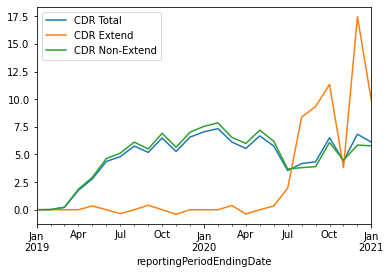

In [11]:
#plot the values
CDRframe.plot(y=['CDR Total','CDR Extend','CDR Non-Extend'], kind='line')